In [1]:
# Include parent directory to system path in order to work with omrsynth
# without installation for experimental purposes...

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import skimage

import omrsynth
import omrsynth.util

reload(omrsynth);
reload(omrsynth.util);

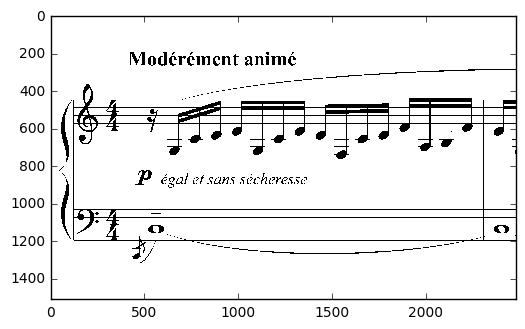

In [3]:
im_sheet = omrsynth.util.io.load_binary_float('../imgs/debussy.png')
plt.imshow(im_sheet, cmap='gray', interpolation='nearest');


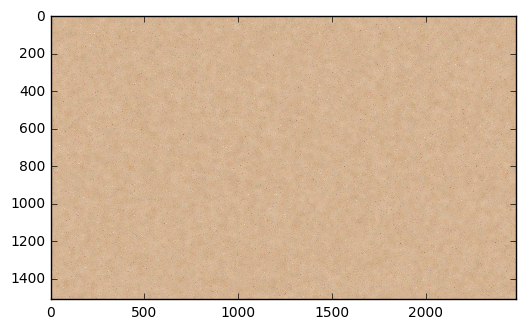

In [4]:
background = omrsynth.paper.basic_texture(im_sheet.shape, 'dark_brown')
plt.imshow(background);

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


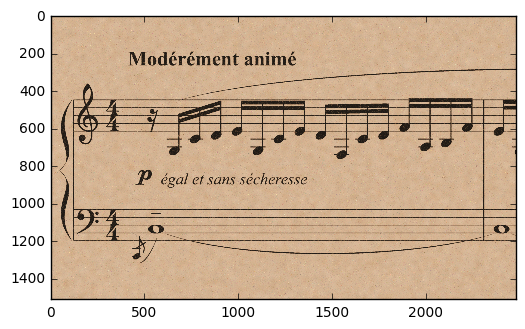

In [5]:
printed = omrsynth.ink.basic_print(im_sheet, level=0.1, blur_size=3)
combined = omrsynth.combine(printed, background, alpha=0.85)
plt.imshow(combined);

skimage.io.imsave('../imgs/printed.png', printed)
skimage.io.imsave('../imgs/combined.png', combined)

In [6]:
for i in range(10):
    texture = omrsynth.paper.basic_texture((512, 512), 'random', seed=i * 10000)
    skimage.io.imsave('../imgs/backgrounds/texture' + str(i) + '.png', texture)
    

In [7]:
for i in range(10):
    texture = omrsynth.paper.basic_texture(im_sheet.shape, 'random', seed=i * 16000)
    combined = omrsynth.combine(printed, texture, alpha=0.95)
    skimage.io.imsave('../imgs/synths/texture' + str(i) + '.png', combined)